# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import datetime as dt
import yfinance as yf
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
# load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Fetch current ETH price
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()

# Compute current value of my crpto
# Assign CAD price
btc_cad_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_cad_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Calculate crypto currency value
my_btc_value = btc_cad_price * my_btc
my_eth_value = eth_cad_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27440.63
The current value of your 5.3 ETH is $8779.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

# Create the Alpaca API object
# YOUR CODE HERE!

### Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [76]:
# Set the tickers
agg_ticker = "AGG"
spy_ticker = "SPY"

# Get current closing prices for SPY and AGG
Start = dt.datetime(2021, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
crypto_df = pd.concat([agg_ticker_df,spy_ticker_df], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
crypto_df.head()

AGG                                      \
                                 open        high         low       close   
Date                                                                        
2021-12-20 00:00:00-05:00  111.985224  112.024323  111.740864  111.750641   
2021-12-21 00:00:00-05:00  111.496488  111.740848  111.398746  111.662651   
2021-12-22 00:00:00-05:00  111.750653  111.770198  111.594259  111.760422   
2021-12-23 00:00:00-05:00  111.711531  111.731077  111.496494  111.623558   
2021-12-27 00:00:00-05:00  111.574694  111.721311  111.555141  111.682213   

                                                                   SPY  \
                             volume Dividends Stock Splits        open   
Date                                                                     
2021-12-20 00:00:00-05:00   7382600       0.0            0  447.224535   
2021-12-21 00:00:00-05:00  12970200       0.0            0  451.288601   
2021-12-22 00:00:00-05:00   6171700       0.0            0  455.401894   
2021-12-23 00:00:00-05:00   5506700       0.0            0  461.266747   
2021-12-27 00:00:00-05:00   5436800       0.0            0  464.523902   

                                                                          \
                                 high         low       close     volume   
Date                                                                       
2021-12-20 00:00:00-05:00  448.129831  443.937859  447.716553  107134800   
2021-12-21 00:00:00-05:00  455.815171  449.025331  455.667572   69806300   
2021-12-22 00:00:00-05:00  460.341743  455.195225  460.223663   58890200   
2021-12-23 00:00:00-05:00  464.651832  461.158518  463.087219   56439700   
2021-12-27 00:00:00-05:00  469.690089  464.474712  469.640900   56808600   

                                                  
                          Dividends Stock Splits  
Date                                              
2021-12-20 00:00:00-05:00       0.0            0  
2021-12-21 00:00:00-05:00       0.0            0  
2021-12-22 00:00:00-05:00       0.0            0  
2021-12-23 00:00:00-05:00       0.0            0  
2021-12-27 00:00:00-05:00       0.0            0

In [77]:
# Pick AGG and SPY close prices
agg_close_price = crypto_df.iloc[0,3]
spy_close_price = crypto_df.iloc[0,10]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.75064086914062
Current SPY closing price: $447.716552734375


In [78]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22385.83
The current value of your 200 AGG shares is $22350.13


### Savings Health Analysis

In [79]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_cryptos = my_btc_value + my_eth_value

my_stocks = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([my_cryptos,my_stocks], columns=["amount"])

# Set index
index = pd.Index(["crypto","shares"])
df_savings = df_savings.set_index(index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36220.231905
shares,44735.955811


<AxesSubplot:title={'center':'Saving Portfolio Composition'}, ylabel='amount'>

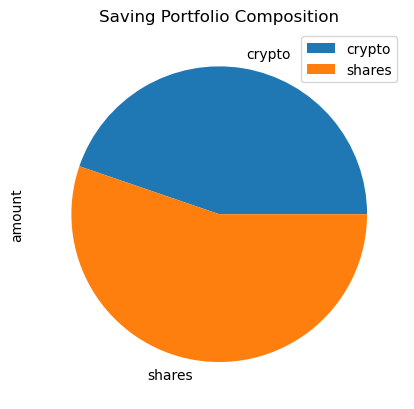

In [80]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Saving Portfolio Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = df_savings.loc["crypto","amount"] + df_savings.loc["shares","amount"]

# Validate saving health
if current_savings > emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, it is ${round((current_savings - emergency_fund),2)} above the emergency fund")
elif current_savings == emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, which is exactly the same as the emergency fund")
else:
    print(f"Currently, you are ${round((emergency_fund - current_savings),2)} away from the emergency fund, keep on saving!!")

Congraturations! your current savings are $80956.19, it is $44956.19 above the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

###  Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
Start = dt.datetime(2017, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_history_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_history_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Drop unnecessary columns
agg_ticker_history_df = agg_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])
spy_ticker_history_df = spy_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker_history_df,spy_ticker_history_df], axis=1, keys=["AGG","SPY"])

df_stock_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.503347  96.618704  96.467850  96.512222   
2017-12-21 00:00:00-05:00  96.544176  96.641822  96.517547  96.597435   
2017-12-22 00:00:00-05:00  96.597467  96.659604  96.588588  96.641853   
2017-12-26 00:00:00-05:00  96.677300  96.766066  96.641792  96.721680   
2017-12-27 00:00:00-05:00  96.774988  97.050174  96.774988  97.023544   

                                           SPY                          \
                            volume        open        high         low   
Date                                                                     
2017-12-20 00:00:00-05:00  4002500  246.307589  246.362675  244.856951   
2017-12-21 00:00:00-05:00  2374500  245.820977  246.417786  245.416996   
2017-12-22 00:00:00-05:00  3292800  245.692446  245.729179  245.049742   
2017-12-26 00:00:00-05:00  1873400  245.187457  245.545543  245.040581   
2017-12-27 00:00:00-05:00  2046900  245.490480  245.811832  245.150775   

                                                 
                                close    volume  
Date                                             
2017-12-20 00:00:00-05:00  245.169113  76751500  
2017-12-21 00:00:00-05:00  245.674072  67032300  
2017-12-22 00:00:00-05:00  245.609818  78720900  
2017-12-26 00:00:00-05:00  245.316010  45244400  
2017-12-27 00:00:00-05:00  245.435394  57751000

In [53]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_thirty = MCSimulation(portfolio_data=df_stock_data, weights = [.4,.6],num_simulation = 500, num_trading_days = 252*30)

In [54]:
# Printing the simulation input data
MC_dist_thirty.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.503347  96.618704  96.467850  96.512222   
2017-12-21 00:00:00-05:00  96.544176  96.641822  96.517547  96.597435   
2017-12-22 00:00:00-05:00  96.597467  96.659604  96.588588  96.641853   
2017-12-26 00:00:00-05:00  96.677300  96.766066  96.641792  96.721680   
2017-12-27 00:00:00-05:00  96.774988  97.050174  96.774988  97.023544   

                                                        SPY              \
                            volume daily_return        open        high   
Date                                                                      
2017-12-20 00:00:00-05:00  4002500          NaN  246.307589  246.362675   
2017-12-21 00:00:00-05:00  2374500     0.000883  245.820977  246.417786   
2017-12-22 00:00:00-05:00  3292800     0.000460  245.692446  245.729179   
2017-12-26 00:00:00-05:00  1873400     0.000826  245.187457  245.545543   
2017-12-27 00:00:00-05:00  2046900     0.003121  245.490480  245.811832   

                                                                          
                                  low       close    volume daily_return  
Date                                                                      
2017-12-20 00:00:00-05:00  244.856951  245.169113  76751500          NaN  
2017-12-21 00:00:00-05:00  245.416996  245.674072  67032300     0.002060  
2017-12-22 00:00:00-05:00  245.049742  245.609818  78720900    -0.000262  
2017-12-26 00:00:00-05:00  245.040581  245.316010  45244400    -0.001196  
2017-12-27 00:00:00-05:00  245.150775  245.435394  57751000     0.000487

In [55]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

MC_dist_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012632,1.003871,1.001197,0.991902,0.991361,1.005216,0.980161,1.005374,1.009491,0.990095,...,1.000853,1.012398,0.996339,1.005538,1.004454,1.004572,1.004252,0.989213,0.996812,0.989883
2,1.019168,0.998731,1.004611,0.994035,1.009397,1.020857,0.975169,1.014445,1.017728,0.987009,...,1.009257,1.023325,1.010406,1.013178,1.013933,0.999906,1.009565,0.997905,0.991330,0.979357
3,1.013461,1.004120,1.008698,1.016046,1.010711,1.012518,0.978475,1.029328,1.016974,0.972431,...,1.018378,1.005139,1.017412,1.011952,1.028131,0.979297,1.006369,1.006510,0.989525,0.984406
4,0.993958,1.011976,1.003456,1.031693,1.015893,1.021779,0.977021,1.027310,1.012297,0.983924,...,1.017178,1.010223,1.018267,1.017929,1.023337,0.976652,0.994024,1.009652,0.991764,0.987402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.401101,39.761375,5.077662,2.652855,27.134146,4.860277,2.580076,21.766528,11.098229,5.915712,...,6.285891,3.867234,0.984499,71.463470,5.758057,15.313831,0.841120,4.718893,1.188484,3.500407
7557,1.421314,39.665198,5.022169,2.641851,26.979757,4.891088,2.600020,22.229189,11.170574,5.977281,...,6.328447,3.854324,0.982225,71.096289,5.764368,15.442527,0.829476,4.704485,1.179509,3.496279
7558,1.415652,39.417624,4.981857,2.624299,27.028593,4.938690,2.593024,21.898201,11.231847,5.908618,...,6.286277,3.855432,0.984474,70.758740,5.802082,15.535527,0.820421,4.704318,1.195325,3.497216
7559,1.420064,39.119988,4.988176,2.614421,26.589952,5.016359,2.605823,21.773703,11.283391,5.948820,...,6.268848,3.899480,0.991921,70.527495,5.875424,15.631228,0.817681,4.737961,1.185094,3.502929


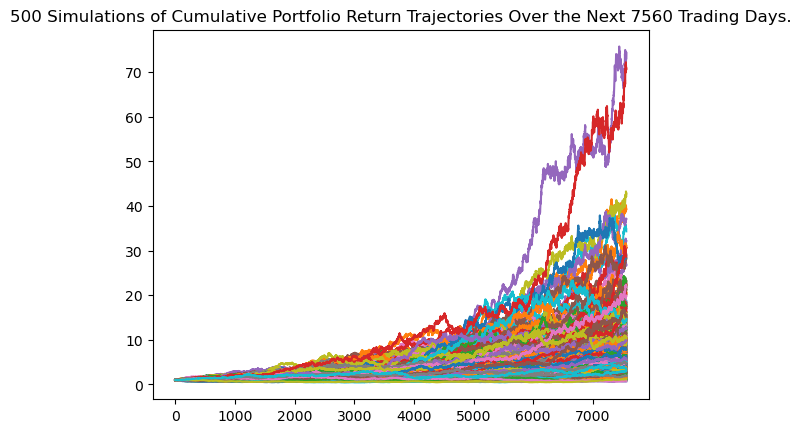

In [56]:
# Plot simulation outcomes
line_plot = MC_dist_thirty.plot_simulation()

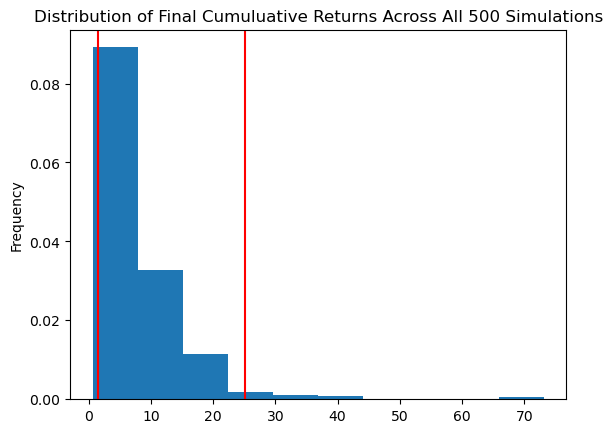

In [57]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_thirty.plot_distribution()

### Retirement Analysis

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_dist_thirty.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean              8.186858
std               7.360033
min               0.668928
25%               3.765376
50%               6.219961
75%               9.994002
max              73.106213
95% CI Lower      1.429952
95% CI Upper     25.050030
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [59]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28599.04 and $501000.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [60]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $42898.56 and $751500.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [61]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_five = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*5)

In [62]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017494,0.994472,1.008707,0.993854,0.987088,1.005514,0.985551,0.995921,1.005884,1.002889,...,0.994376,1.008685,0.993861,1.005963,1.008896,1.012771,1.022715,1.003135,0.986279,1.003985
2,1.023996,0.998046,1.015068,1.002820,0.984744,1.002327,0.959720,1.002983,1.020404,1.004953,...,0.980397,0.993564,0.996239,1.009073,1.004317,1.025323,1.030206,1.020348,0.988942,1.015901
3,1.042702,0.984263,1.016052,0.996899,0.961682,1.004072,0.959703,1.009908,1.023920,0.982997,...,0.982548,1.017611,1.000511,1.034430,1.013771,1.028509,1.018307,1.009867,0.980722,1.018246
4,1.040585,1.019824,1.024533,1.008959,0.968163,0.998975,0.966328,1.052195,1.021521,0.995866,...,0.969845,1.042808,0.984266,1.030563,1.011612,1.034150,1.024086,1.021381,0.982198,1.045730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.651834,1.070085,2.567580,1.482225,1.189326,1.648384,0.890554,2.792939,1.556875,2.568860,...,0.795807,2.693290,0.873903,1.589184,1.889274,1.333507,1.753672,2.052083,1.590696,1.162888
1257,1.642738,1.077977,2.565688,1.473539,1.200673,1.651559,0.885912,2.778437,1.545798,2.560936,...,0.801250,2.661989,0.879614,1.633634,1.880305,1.323776,1.735494,2.031798,1.605980,1.161738
1258,1.652663,1.088598,2.570485,1.490807,1.203601,1.628148,0.883984,2.805852,1.541173,2.579174,...,0.797140,2.681924,0.874503,1.631192,1.889145,1.325918,1.745637,2.052164,1.601392,1.176401
1259,1.678096,1.083000,2.562985,1.498143,1.218020,1.670794,0.893821,2.857831,1.550797,2.619253,...,0.790610,2.703983,0.873070,1.650816,1.909619,1.317590,1.754254,2.043272,1.606836,1.166658


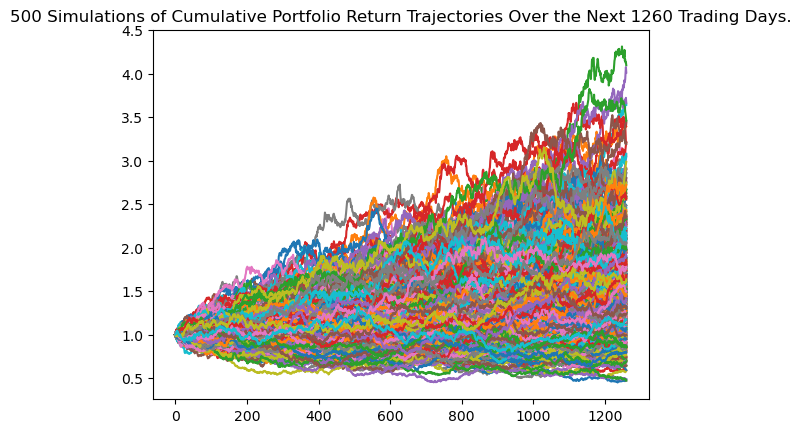

In [63]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_five.plot_simulation()

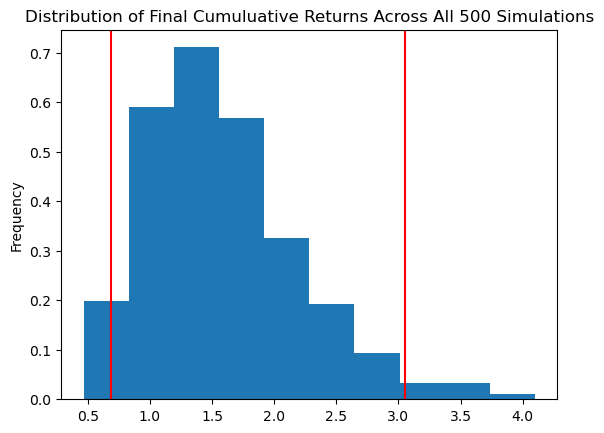

In [64]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_five.plot_distribution()

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_five_stat = MC_dist_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_five_stat)

count           500.000000
mean              1.588183
std               0.613561
min               0.468869
25%               1.149405
50%               1.502910
75%               1.911477
max               4.098004
95% CI Lower      0.689578
95% CI Upper      3.053815
Name: 1260, dtype: float64


In [66]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_portfolio_five_stat[8]*initial_investment,2)
ci_upper_five = round(summary_portfolio_five_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41374.67 and $183228.93


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_ten = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*10)

In [69]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998915,0.996924,0.979592,1.001468,0.982834,0.999566,1.009099,0.997795,1.027418,0.999924,...,1.002988,1.002888,0.988834,0.990887,0.994214,0.979246,1.013157,0.992278,0.981000,1.004814
2,0.999480,0.989839,0.987244,1.001556,0.972429,0.998662,0.997919,1.008281,1.028951,1.004699,...,1.013779,1.021250,0.982375,0.989875,0.962917,0.964389,1.037098,0.981647,1.002914,0.991159
3,0.999084,1.002696,0.988944,0.988110,0.967727,1.009399,1.005672,1.000836,1.030644,0.997088,...,0.999457,0.998860,0.979247,0.985007,0.967952,0.954409,1.047976,0.991947,1.006273,0.983500
4,1.011076,1.015982,0.981768,0.994788,0.982394,0.990355,0.996022,0.997022,1.041031,0.992063,...,0.975592,0.996023,0.977984,1.006701,0.960388,0.965891,1.063477,1.028054,0.997983,0.996664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.450630,2.640088,2.265566,3.281341,0.569877,2.161689,2.924815,0.948837,3.794929,3.228510,...,1.394153,1.916079,1.928439,1.243079,1.274213,5.046642,3.724447,1.474893,2.142269,1.788972
2517,4.499493,2.593385,2.268429,3.344086,0.580061,2.161980,2.940365,0.957284,3.713299,3.220571,...,1.388059,1.912157,1.918738,1.254102,1.279768,5.056473,3.779739,1.487701,2.149169,1.741789
2518,4.457501,2.575848,2.257860,3.437855,0.585638,2.168770,2.860361,0.952958,3.785206,3.202765,...,1.382372,1.895802,1.930604,1.262615,1.291934,4.984165,3.815371,1.492043,2.122123,1.714169
2519,4.459215,2.601973,2.301941,3.466388,0.580055,2.168086,2.874177,0.956782,3.798373,3.158316,...,1.402496,1.886883,1.982444,1.248587,1.290826,4.990600,3.782539,1.485515,2.107709,1.721800


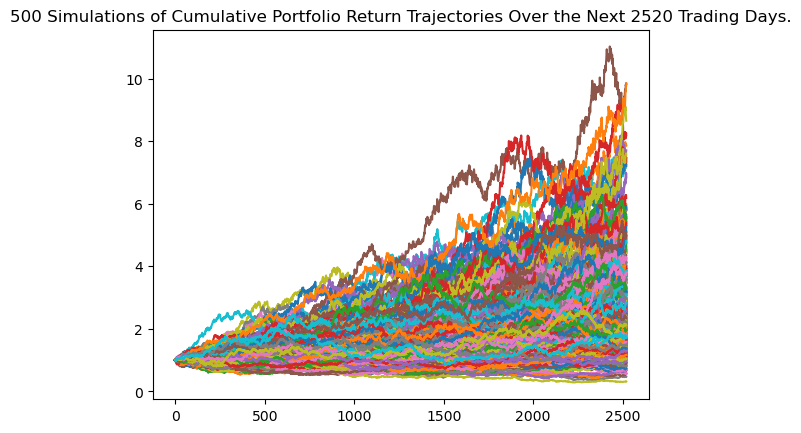

In [70]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_ten.plot_simulation()

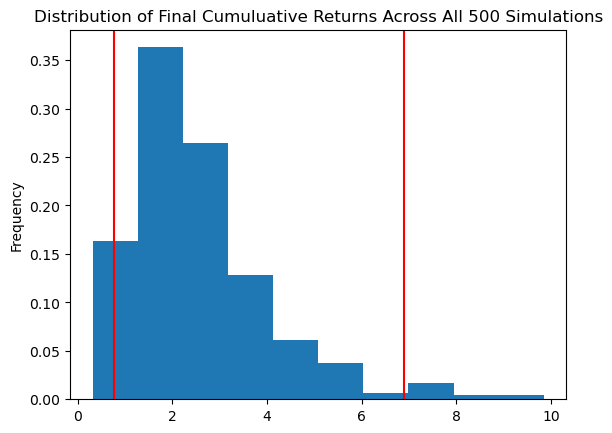

In [71]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_ten.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_ten_stat = MC_dist_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_ten_stat)

count           500.000000
mean              2.564387
std               1.491982
min               0.319350
25%               1.502490
50%               2.206172
75%               3.161363
max               9.844022
95% CI Lower      0.758181
95% CI Upper      6.897128
Name: 2520, dtype: float64


In [75]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_portfolio_ten_stat[8]*initial_investment,2)
ci_upper_ten = round(summary_portfolio_ten_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $45490.83 and $413827.69
